<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [145]:
# omite os avisos em vermelho (que nao sao erros) do python
import warnings

warnings.filterwarnings('ignore') 
# ou warnings.filterwarnings(action='once') - nesse caso vai aparecer a msg so uma vez

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li> 
</ul>

Consumo de cerveja é minha variavel dependente

## Leitura dos dados

In [146]:
# sair da pasta Projeto e ir na pasta dados
dados=pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [147]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [148]:
# alternativamente
dados = pd.read_table('../Dados/Consumo_cerveja.csv', sep=';')
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset

In [149]:
dados.shape
# 365 linhas e 7 variaveis

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [150]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


As variaveis parecem razpaveis, veja a temp maxima e minima sao razoaveis, todas variaveis tem count de 365 dias

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [151]:
# correlacao é o primeiro passo para ver a relacao entre as variaveis
dados.corr().round(4)
#shift tab voce ve as opcoes

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Veja correlacao entre consumo e temp min e temp max, com o fds e relacao negativa com chuva.
Variavel dependente é chuva. As independentes eu escolheria preliminarmente tem, chuva e fds e uma so temp, ter variaveis muito correlacionadas (como temp min, max e media) nao é bom para o modelo, so uma delas, cc voce coloca mais do mesmo

No momento de selecionar as variáveis para o modelo, apenas foram descartadas as variáveis temp_media e temp_min, uma vez que têm uma alta correlação com a temp_max. Isso significa que elas têm um comportamento muito próximo para explicar o consumo de cerveja (variável target).

Essa redução de dimensionalidade das variáveis é uma técnica muito utilizada.

A PCA é uma técnica de redução de dimensionalidade que segue essa ideia: PCA

In [152]:
# alternativamente
corr_df = dados.corr().round(4)
corr_df.style.background_gradient(cmap='Blues')

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862800,0.922500,0.024400,-0.050800,0.574600
temp_min,0.862800,1.000000,0.672900,0.098600,-0.059500,0.392500
temp_max,0.922500,0.672900,1.000000,-0.049300,-0.040300,0.642700
chuva,0.024400,0.098600,-0.049300,1.000000,0.001600,-0.193800
fds,-0.050800,-0.059500,-0.040300,0.001600,1.000000,0.506000
consumo,0.574600,0.392500,0.642700,-0.193800,0.506000,1.000000


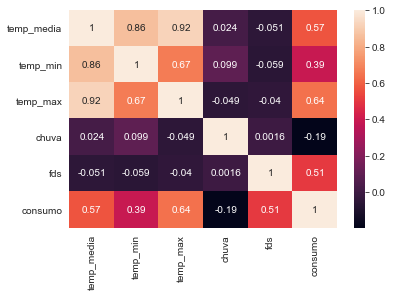

In [153]:
# alternativamente
import seaborn as sns
import matplotlib.pyplot as plt

#Criação da tabela de correlação
sns.heatmap(dados.corr().round(4), annot=True)

Em modelos de regressão linear, é importante verificarmos se as variáveis explicativas (X's) têm forte correlação com a variável dependente (Y)
Em modelos de regressão linear, é importante que as variáveis explicativas (X's) não tenham forte correlação entre si

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

Primeiro voce faz analise visuais informais para ver se existem problemas

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [154]:
x,y=(28,11)

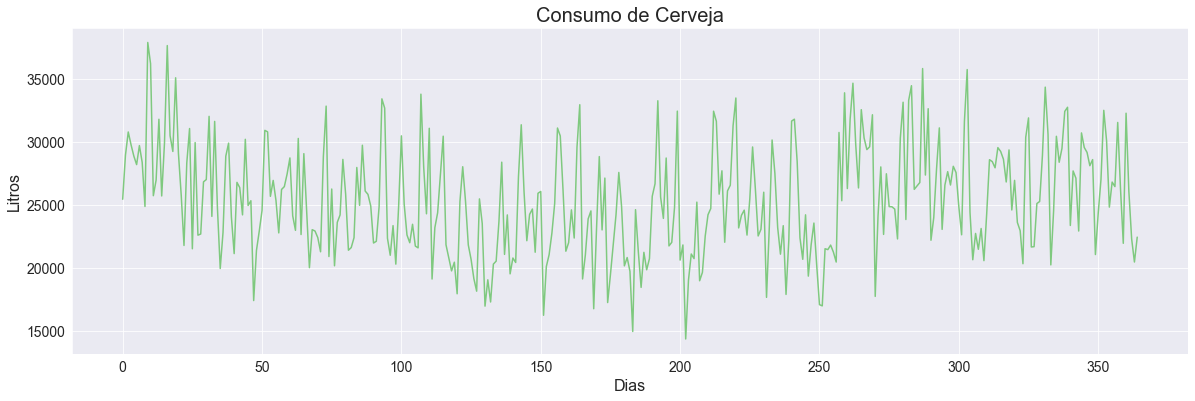

In [155]:
fig, ax=plt.subplots(figsize=(20,6))
# subplots permite eu colocar mais de um grafico junto, no caso aqui so faremos um

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

Existe minimento no inicio maior consumo de cerveja e menos no meio do ano, o que coincide com verao e inverno. Seria preciso modelar se tivessemos structural break

Vendo outras variaveis:

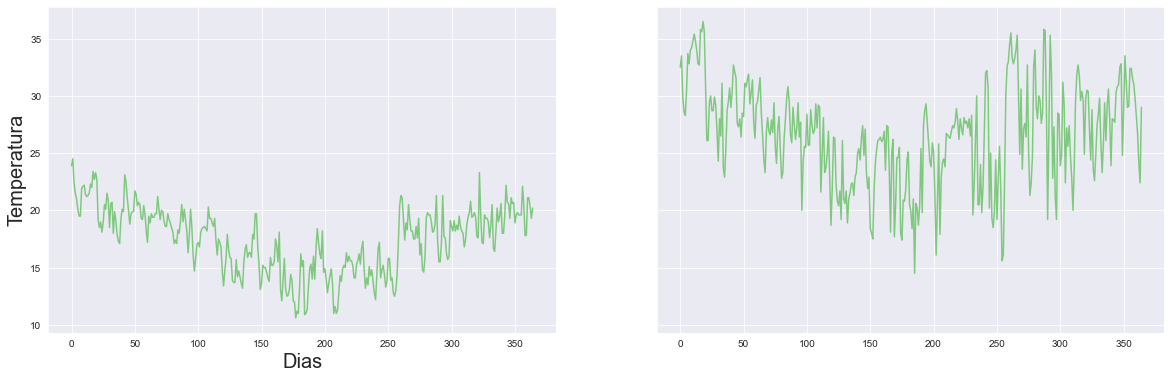

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), sharex = True, sharey = True)
ax1.set_ylabel('Temperatura', fontsize = 20)
ax1.set_xlabel('Dias', fontsize = 20)

ax1.plot(dados['temp_min'])
ax2.plot(dados['temp_max'])

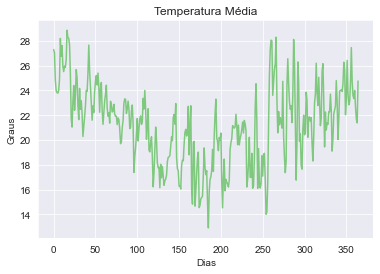

In [157]:
# ou temp media
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title('Temperatura Média')
ax.set_ylabel('Graus')
ax.set_xlabel('Dias')
ax = dados['temp_media'].plot()

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

Sobre a ferramenta gráfica box plot:

O box plot nos ajuda a identificar a presença de algum tipo de assimetria na distribuição dos dados

Podemos utilizar o box plot como ferramenta para identificar possíveis outliers em nosso conjunto de dados

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [158]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

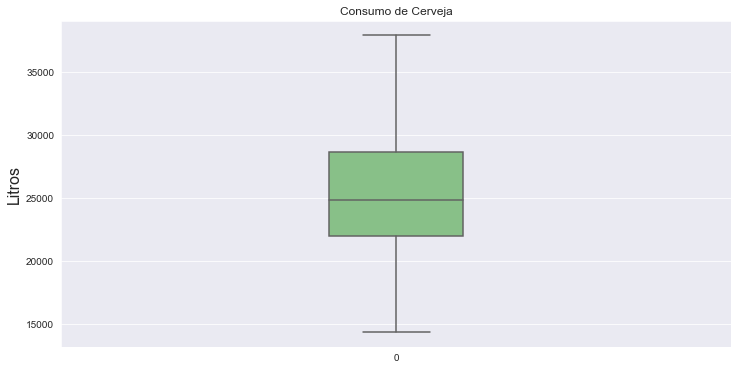

In [159]:
ax=sns.boxplot(data=dados['consumo'], orient='v',width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja')
ax.set_ylabel('Litros', fontsize=16)
ax
# nao aparece outliers, a distribuicao parece bem comportada (mediana no lugar certo)

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

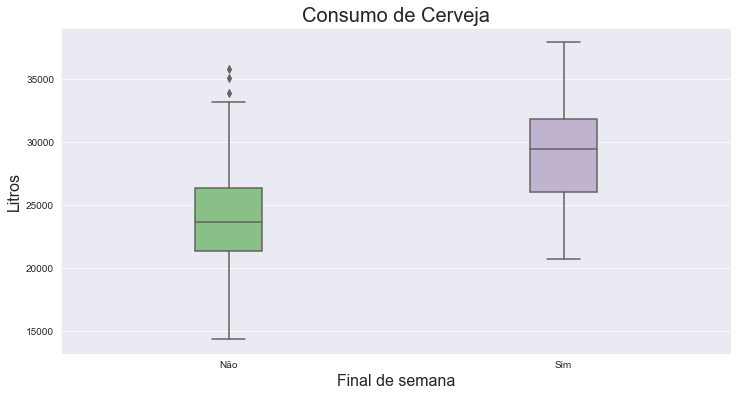

In [160]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de semana', fontsize=16)
ax.set_xticklabels(['Não', 'Sim'])

ax

Visivelmente o consumo em média é maior em final de semana. Intuitivamente isso é natural. Em azul temos alguns outliers, que podem ser feriados. Podemos ver esses outliers em dia da semana da forma seguinte:

In [161]:
selecao = dados['fds'] == 0
dados_semana = dados[selecao]
valor = dados_semana['consumo']
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
selecao = (valor > limite_superior)
outliers_consumo_dados_semana = dados_semana[selecao]
outliers_consumo_dados_semana

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
19,20/01/2015,27.68,23.3,35.6,0.6,0,35127
259,17/09/2015,27.26,20.4,33.0,0.0,0,33930
287,15/10/2015,28.12,18.9,35.8,0.0,0,35861


Nenhum desses dias foi feriado em São Paulo em 2015. No entanto, como a pesquisa foi realizada em uma área universitária, talvez justifique o dia 20/jan como algo relacionado ao inicio do ano letivo e o dia 15/out que é dia do professor, mas não achei nada para o dia 17/set. Ou simplesmente houve um erro de digitação nesses dias ou foi um dia atipico mesmo, como ele é um evento isolado podemos descartá-lo na análise, uma vez que não irá interferir como um todo, ou escolher alguma outra estratégia.

In [162]:
# soma do consumo na semana e no final de semana, Como esperado na semana é maior pois ha mais dias
#Data frame with beer consumption proportion in the week and weekend
consumption_week = pd.DataFrame({
    'Weekend': [round((dados.query('fds == 1')['consumo'].sum() / dados['consumo'].sum()) * 100, 2)],
    'Week': [round((dados.query('fds == 0')['consumo'].sum() / dados['consumo'].sum()) * 100, 2)]},
    index=['%'])

consumption_week
# 67% do total do consumo se deu durante a semana

,Weekend,Week
%,32.44,67.56


In [163]:
# ou
egg = {'weekend': [4, 4], 'work_day': [2, 2, 2, 2, 2]}

total_consumption = sum(egg['weekend']) + sum(egg['work_day'])

weekend = round(sum(egg['weekend']) / total_consumption, 2)
work_day = round(sum(egg['work_day']) / total_consumption, 2)

print(f'weekend: {weekend}%\nwork_day: {work_day}%')
# Output:
# weekend: 0.44%
# work_day: 0.56%

weekend: 0.44%
work_day: 0.56%


## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [164]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

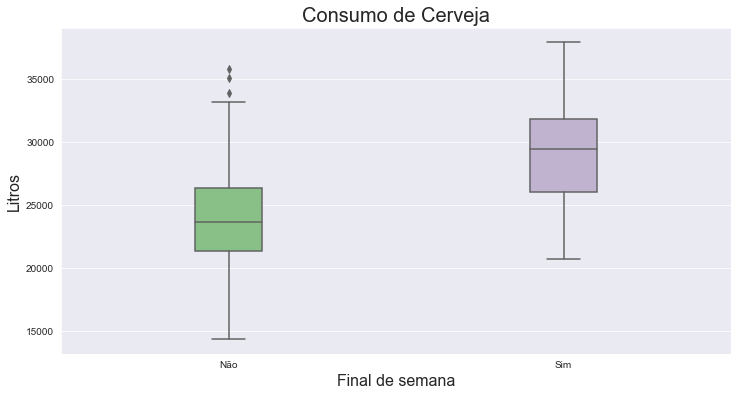

In [165]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de semana', fontsize=16)
ax.set_xticklabels(['Não', 'Sim'])

ax

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

Modelos de regressão linear assumem, inicialmente, que a variável dependente segue uma distribuição normal.

Se nao é normal temos que fazer testes - proximo curso

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

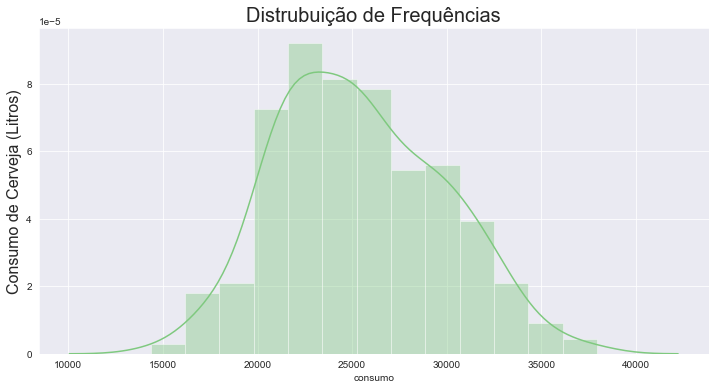

In [166]:
# Histograma do consumo
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax
# quase normal. Podemos talvez transformar a variavel e torna-la dist normal

Sobre a distribuição da variável dependente:

Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal

Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

Uma das funções da biblioteca seaborn para plotar o histograma de uma variável é a distplot()

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

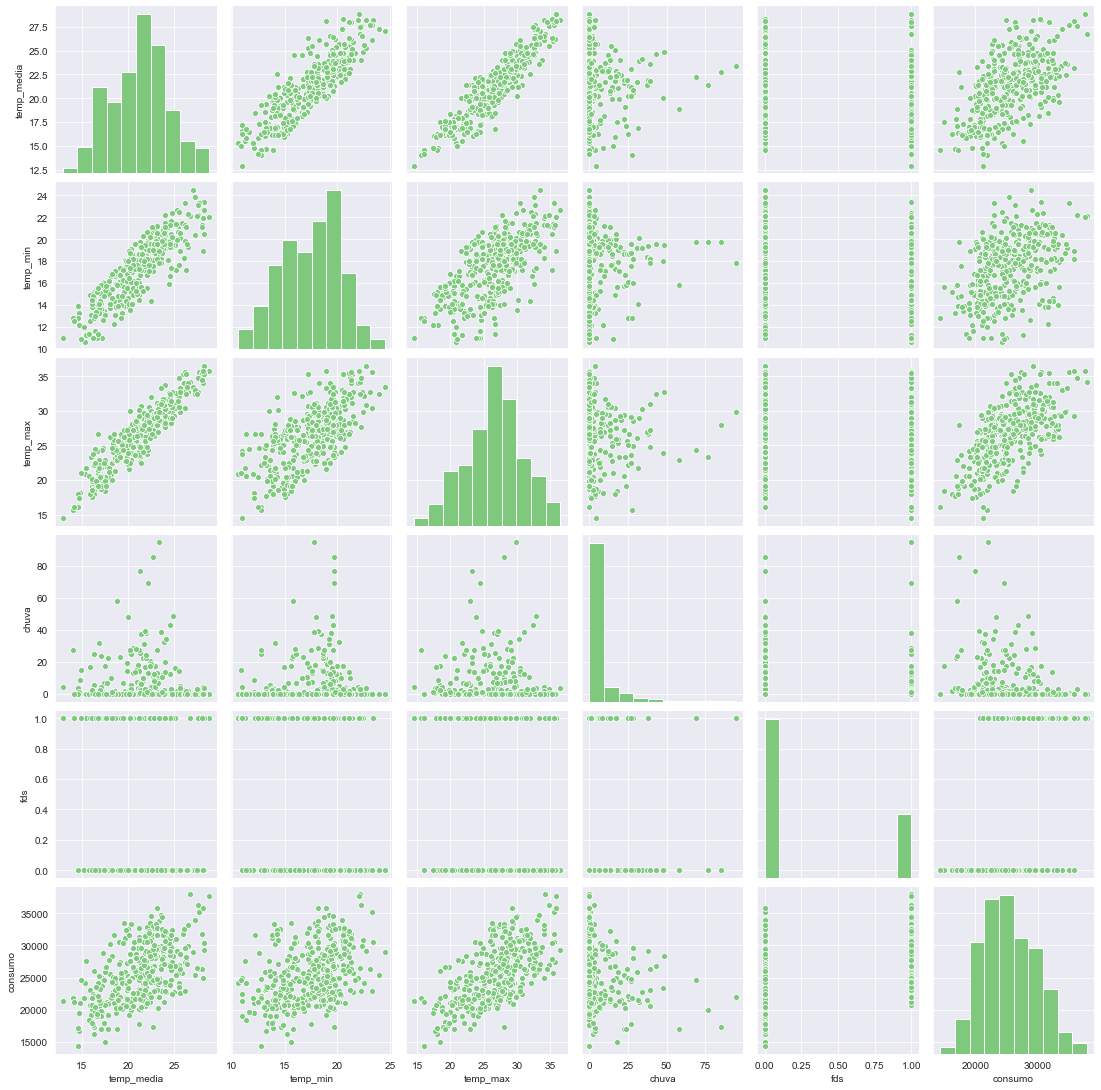

In [167]:
ax=sns.pairplot(dados)
# esse grafico é meio pesado, se for muito grande a base talvez ele nem saia 
# ai faz scatter plot para cada caso

## Plotando o pairplot fixando somente uma variável no eixo y

O que mais nos interessa é a ultia linha, consumo contra as outras variaveis

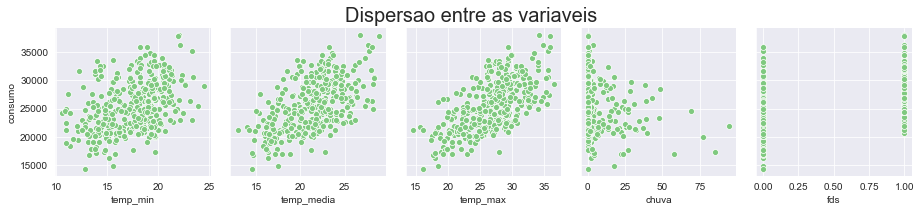

In [168]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersao entre as variaveis', fontsize=20, y=1.1)
ax

temp_min, temp_media e temp_max voce ve que tem uma relacao com consumo, mas tem uma tendencia mais forte com temp_max. A chuva parece nao muito claro, mas quanto mais chuva (a direita do grafico) parece menos consumo. Por fim, final de semana, vemos diferencas

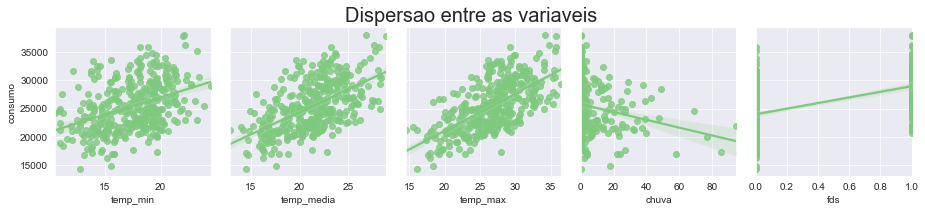

In [169]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersao entre as variaveis', fontsize=20, y=1.1)
ax

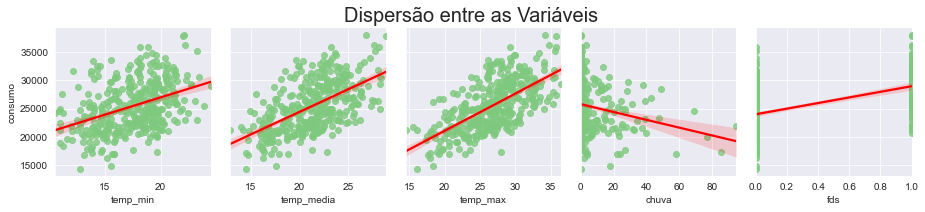

In [170]:
# mudando a cor da linha reg
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'],
    kind='reg',
    plot_kws={'line_kws':{'color':'red'}}
)

ax.fig.suptitle("Dispersão entre as Variáveis", fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

Jointplot é uma alternativa to pairplot

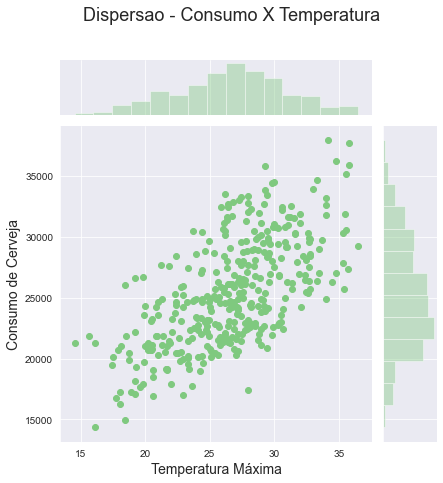

In [171]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.1)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax
# a direita e acima estao a dist de freq do consumo de cerveja e de temp max

## Plotando um jointplot com a reta de regressão estimada

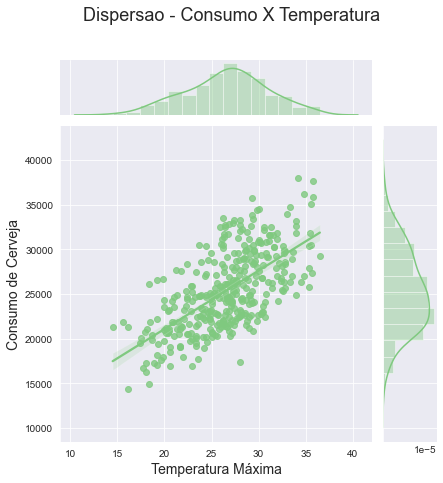

In [172]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.1)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

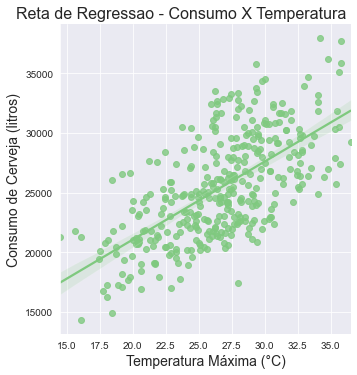

In [173]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

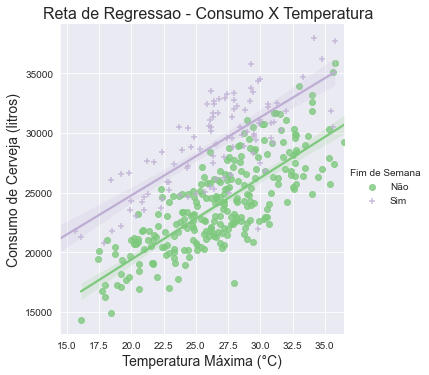

In [174]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, hue='fds',markers=['o','+'],legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
# configurando a legenda do gráfico
for item, legenda in zip(ax._legend.texts, ['Não', 'Sim']): 
    item.set_text(legenda)
ax
# visivelmente o consumo é maior no fds

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

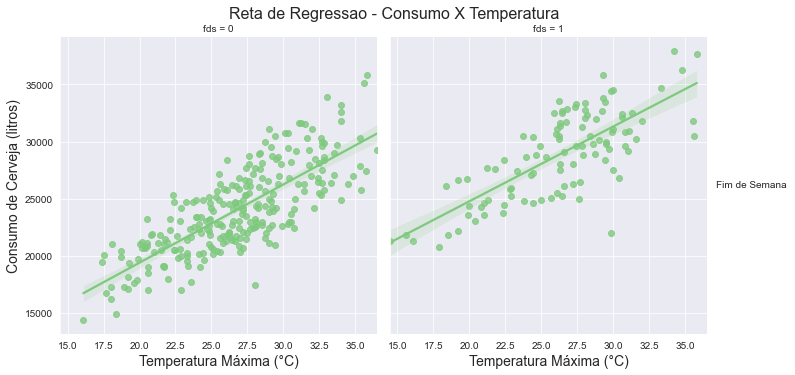

In [175]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, col='fds')
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



### Utilizamos a técnica de machine learning de modelos de aprendizagem supervisionada, que é a separacao entre dados de treino e teste. Supervisionado pois temos o valor real do dado que estamos testando, a gente separou os dados num subconjunto de treino, treinou o modelo e testou nos dados de teste, onde tenho o y real. Ai faco a estimativa e comparo com os dados reais e consigo estimar umas metricas de comparacao. Estamos vendo o quanto da variacao do fenomeno é explicada pelas var indep (R2)

Inicialmente, separaremos nossos dados em train e test para modelar nossa regressão e testá-la. Importaremos a função train_test_split do sckit-learn para executar esta tarefa.

Feita a importação, precisaremos preparar nosso dataset geral, isto é, nosso dataframe dados. Precisaremos dividir o dataframe em series que contém a variável dependente e outro dataframe que contém as variáveis explicativas. 

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [229]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [230]:
# dividimos nosso data frame em uma serie que tem a nossa variavel dep e outra com as indep
y=dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [231]:
X=dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

In [232]:
X_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=2811)
# test size: ele ta selecionando aleatoriamente 30% do meu dataset para teste
# 30% para teste e os 70% para treino
# random_state é o seed

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [233]:
X_train.shape
# dataframe com 255 linhas e 3 colunas, 3 variaveis e 255 dias 

(255, 3)

In [234]:
x_test.shape
# 110 obs

(110, 3)

In [235]:
X_train.shape[0]+x_test.shape[0]
# 365 dias como deveria ser

365

In [236]:
X.shape[0]*0.3

109.5

In [237]:
X.shape[0]*0.7

255.49999999999997

Quando fazemos um projeto que envolva aprendizado de máquina, precisamos ter esses dois datasets diferentes para que o modelo aprenda com uma parte e teste com outra, para que nos seja dado o valor de quanto, em porcentagem, o modelo acertou na regressão. Se não fizessemos isso, o modelo aprenderia e testaria com os mesmos dados, e se fossem colocado dados totalmente diferentes posteriormente, teria um resultado péssimo, já que ela seria ótima em saber os dados que já conhecia previamente, mas não é boa pra novos dados, chamamos isso de overfitting.

A técnica de separação aleatória de um dataset em dois conjuntos distintos (conjuntos de treino e teste), estimar o modelo com os dados de um destes conjuntos (conjunto de treino) e posteriormente realizar estimações com os dados do segundo conjunto (conjunto de teste) é uma técnica bastante utilizada em data science, para confirmar a eficácia do modelo estimado.

O scikit-learn disponibiliza uma função que faz essa separação, basta que informemos os dados de nosso modelo e qual o tamanho desejado dos conjuntos de treino e teste. Seria da seguinte forma o código:

In [238]:
train_test_split(X, y, test_size=0.3)


[     temp_max  chuva  fds
 66       24.4   69.2    1
 73       26.8    0.3    1
 347      32.5    2.0    0
 284      29.6    0.0    0
 13       34.0    1.6    0
 ..        ...    ...  ...
 62       30.5    0.0    0
 322      30.4    0.0    0
 355      32.4   43.0    0
 352      31.3    1.3    1
 197      24.3    0.0    0
 
 [255 rows x 3 columns],
      temp_max  chuva  fds
 152      17.5    0.5    0
 23       29.4   13.0    1
 108      27.2    0.0    1
 125      20.4    0.0    0
 124      20.8    9.9    0
 ..        ...    ...  ...
 67       23.3   77.0    0
 243      30.7    0.0    0
 0        32.5    0.0    0
 183      18.4   17.8    0
 258      32.6    0.0    0
 
 [110 rows x 3 columns],
 66     24619
 73     32872
 347    28131
 284    26249
 13     31825
        ...  
 62     22988
 322    22960
 355    26828
 352    32536
 197    22032
 Name: consumo, Length: 255, dtype: int64,
 152    20106
 23     28348
 108    28028
 125    20680
 124    21826
        ...  
 67     20016
 24

Onde X é o nosso conjunto de variáveis explicativas, y a nossa variável dependente e test_size o percentual da base que desejamos separar para testes, no caso acima, 30%.

Esta função retorna, para o conjunto de variáveis explicativas (X), um conjunto de treino e outro de teste (X_train e X_test) e para a variável dependente (y), um conjunto de treino e outro para teste (y_train e y_test). 

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [240]:
modelo=LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [241]:
modelo.fit(X_train,y_train)
# fit do modelo com os dados de treino

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [242]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))
# R2 do dado ajustad, previsto no meu treino

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [243]:
y_previsto=modelo.predict(x_test)
# criamos as previsoes em cima dos dados de teste

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [244]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))
# aqui fazemos a comparacao do que foi previsto e do que realmente aconteceu
# 69% de explicacao a gente consegue com o modelo que estimamos

R² = 0.69


O overfiting é um ponto a parte. Ele diz respeito ao sobreajuste que ocorre em um conjunto de dados, ou seja, quando o modelo aprende muito com a amostra de treino a ponto de não ter a capacidade de previsão na amostra de validação.

Dessa forma, a melhor maneira de avaliar o overfiting de um modelo é comprar o R^2 da amostra de treino com o R^2 do teste.

O que ocorre geralmente, é o aumento gradativo do R^2 do treino e o não aumento do R^2 na amostra de teste, a medida que cada iteração ocorre. Quando isso começar acontecer, podemos dizer que o modelo está sendo sobreajustado na amostra de treino (e neste caso ele pode chegar até 1).

Agora, enquanto o valor de R^2 não parar de crescer na amostra de teste, não pode-se dizer que o modelo está sendo sobreajustado no treinamento e isso independe do valor de R^2. Ele pode começar a sobreajustar em 0,73 ou 0,84.

Lembrando que, em uma situação real, é muito suspeito termos R^2 = 1 na amostra de treino e teste.

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

Quando estamos fazendo uma estimativa, vamos encontrar um valor médio dentro de um intervalo de confiança.

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas

O valor médio da "primeira" diz respeito a variável dependente que desejamos estimar.

A reta que ajustamos ao modelo sempre possui um erro, portanto o valor em um ponto sempre tem uma margem de erro para cima e para baixo. do valor apresentado, no caso o valor médio.

## Dados de entrada

In [245]:
entrada=x_test[0:1]
entrada
# esse é um ponto do nosso dataset

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [193]:
modelo.predict(entrada)[0]
# ele ta gerando a previsao para esse ponto
# Ou seja, para um dia com os parametros da entrada: temp_max de 30 graus,
# chuva 12.2 e fds=0, ou seja dia de semana
# tem uma previsao de consumo medio de cerveja de 26094.9 litros

26094.901775262013

## Criando um simulador simples

In [194]:
# Imagina que você é o dono do bar, dado as informacaoes do dia anterior, 
# voce vai estimar quanto de cerveja vai ser necessario no dia seguinte
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max,chuva,fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


In [195]:
# caso eu mude os parametros, o consumo muda assim:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

Intercepto: representa o consumo médio de cerveja (Yi) quando todas as minhas var explicativas sao zero. Ou seja, mesmos todas as var indp igual a zero, voce tem uma media de consumo de cerveja, o intercepto mostra isso.

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [246]:
modelo.intercept_
# ou seja retirando o efeito de todas essas outras variaveis, ou seja
# zerando as, o consumo médio é de 5951 litros de cerveja indp das outras var

5951.976339312456

In [197]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

Coeficientes B: O valor médio de Y dado uma variacao de uma unidade em uma das var independentes. Em temp max: variando um grau varia quanto em media o consumo de cerveja ceteris paribus (ou seja, mantendo todas as outras variaveis sem variar) - isso é o efeito direto.

In [198]:
modelo.coef_
# coeff da temp max, chuva e fds (segue a ordem que eles entraram no modelo)

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [247]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [248]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [249]:
index=['Intercepto','Tempratura Maxima','Chuva(mm)','Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [250]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Paramêtros'])

,Paramêtros
Intercepto,5951.976339
Tempratura Maxima,684.736759
Chuva(mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [251]:
y_previsto_train = modelo.predict(X_train)
# valor estimado de y

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

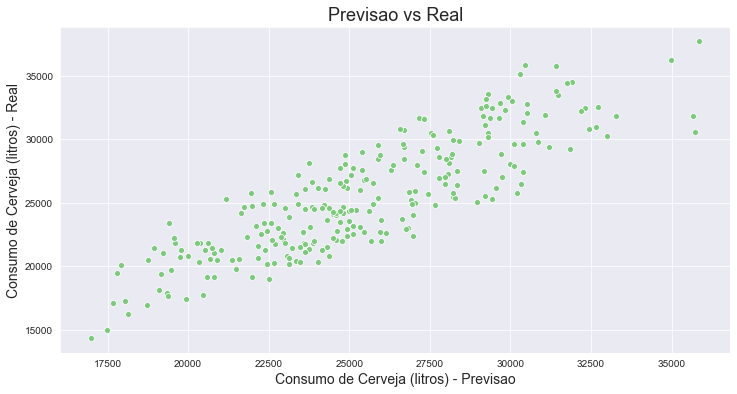

In [211]:
ax=sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsao vs Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsao', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
sns.set(style="darkgrid")
ax

Parece que a previsao e o real estao bons, mas os pontos se aproximam de uma reta 45° para valores menores de consumo do que maiores. O certo todos deveriam estar perto da reta

## Obtendo os resíduos

In [252]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

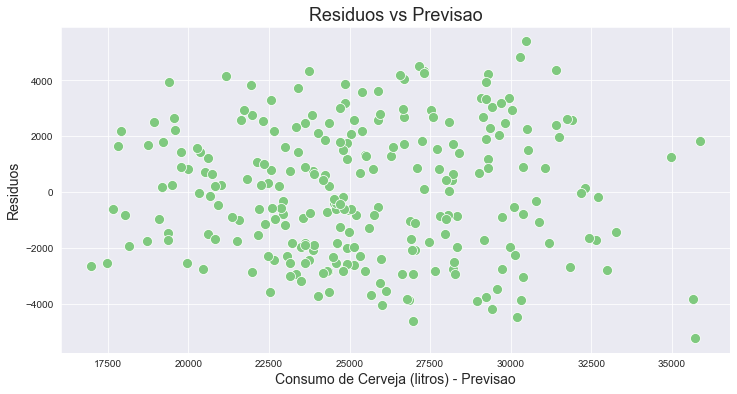

In [210]:
ax=sns.scatterplot(x=y_previsto_train, y=residuo, s=100)
ax.figure.set_size_inches(12,6)
ax.set_title('Residuos vs Previsao', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsao', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
ax

O residuo deveria ter media 0 o que parece o casa.
Homocedasticidade: variacao precisa ser constante, vemos que os residuos no comeco ficam entre - e + 4000, mas com maiores nives de consumo de cerveja os residuos saem desse intervalo, indicando que ta crescendo

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

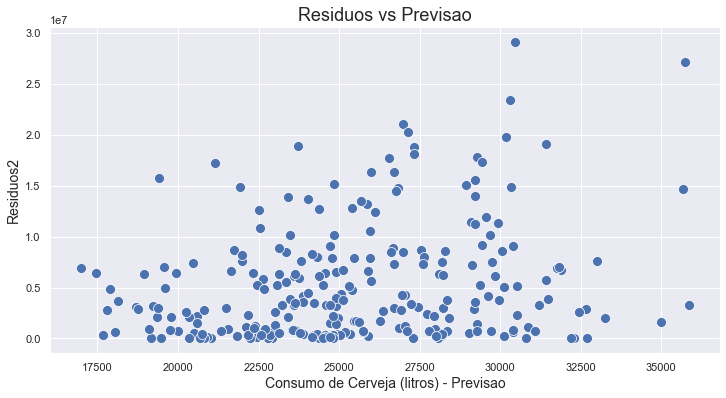

In [213]:
ax=sns.scatterplot(x=y_previsto_train, y=residuo**2, s=100)
ax.figure.set_size_inches(12,6)
ax.set_title('Residuos vs Previsao', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsao', fontsize=14)
ax.set_ylabel('Residuos2', fontsize=14)
ax

Veja que parece com o primeiro caso de heterocedasticidade.

## Plotando a distribuição de frequências dos resíduos

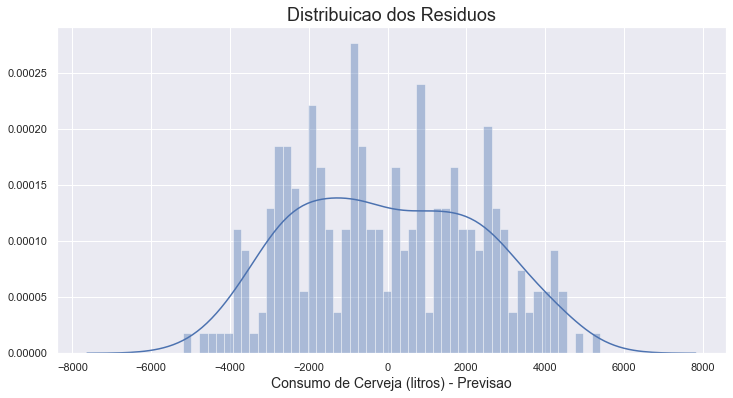

In [216]:
ax=sns.distplot(residuo, bins=50)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuicao dos Residuos', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsao', fontsize=14)
ax

Idealmente deveriamos ter uma curva normal

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

Geralmente trabalhamos com dados que possuem muitas variáveis, e pode ser do nosso interesse testar conjuntos diferentes de variáveis explicativas para ver qual delas representa melhor a variação da variável dependente.

No nosso modelo poderiamos ter por exemplo numero de pessoas no local, etc.

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [253]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [254]:
X2_train, X2_test, y2_train, y2_test =train_test_split(X2,y,test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [255]:
modelo_2=LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [256]:
modelo_2.fit(X2_train,y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [257]:
print('Modelo com Tem. Media')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Tem. Media
R² = 0.66


In [259]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Tem. Máxima
R² = 0.73


Indicando que usando temp media o R2 cai

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [263]:
y_previsto= modelo.predict(x_test)
y_previsto_2= modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [267]:
print('Modelo com Tem. Media')
print('R² = {}'.format(metrics.r2_score(y2_test,y_previsto_2).round(2)))

Modelo com Tem. Media
R² = 0.66


In [266]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

Modelo com Tem. Máxima
R² = 0.69


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



Com a raiz quadrada vemos na mesma unidade que estamos trabalhando com a var dep

## Obtendo métricas para o modelo com Temperatura Média

In [268]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [271]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


EQM, REQM deveriam ser minimizados.
O modelo debaixo, com temperatura maxima, tem maior R2 e menor EQM e REQM, indicando que é mais apropriado que o modelo usando temp media

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

Eu salvo para poder usar o modelo no futuro. Demora muito para fazer um as vezes

## Dados de entrada

In [273]:
x_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [274]:
entrada=x_test[0:1]

## Gerando previsão pontual

In [275]:
modelo.predict(entrada)[0]

26094.901775262013

## Criando um simulador simples

In [280]:
temp_max=30.5
chuva=12.2
fds=0
entrada=[[temp_max,chuva,fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [281]:
# pega o modelo e salva na nossa pasta para usar depois
import pickle

In [282]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```